# Lightcurve Manipulation

In [1]:
%matplotlib inline

import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install lightkurve
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install astropy

import matplotlib.pyplot as plt
import lightkurve as lk
import astropy
import numpy as np

## Star Selection

In [2]:
TIC = 'TIC 284475976' # TIC Star ID
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23) # can remove each arg if needed
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0


<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

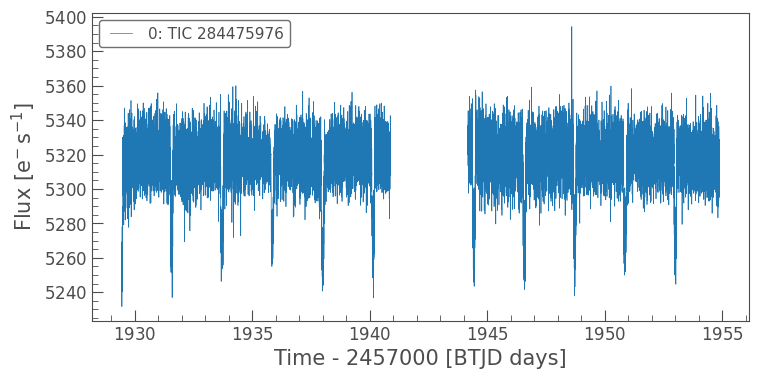

In [3]:
lc = sector_data.download_all()
lc.plot()

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

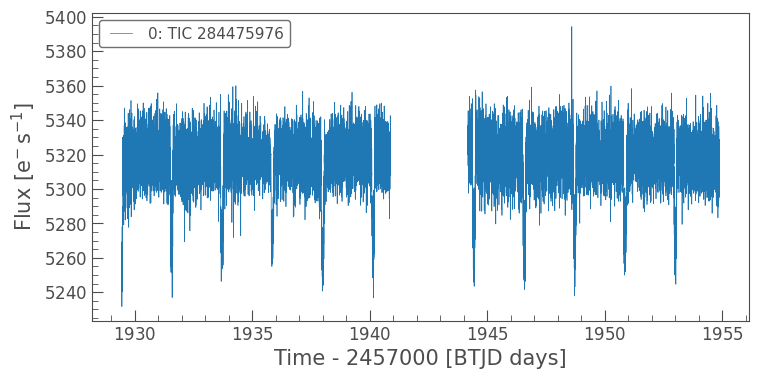

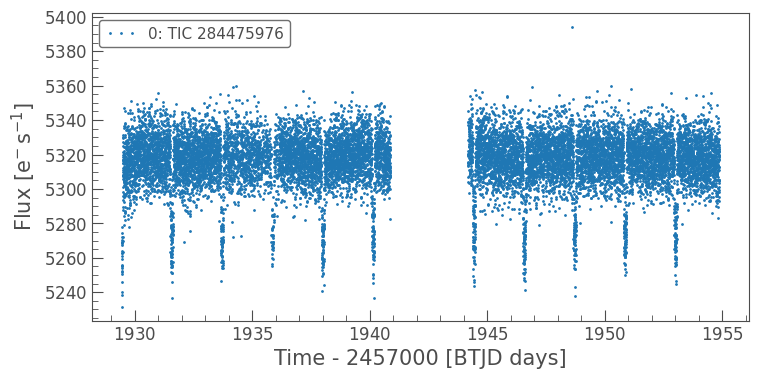

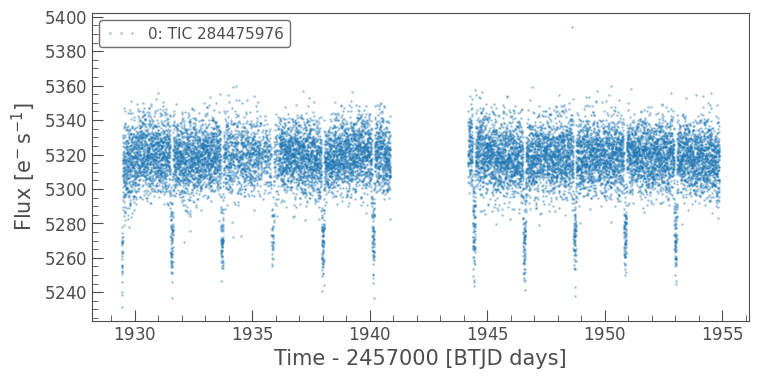

In [4]:
lc = sector_data.download_all()
lc.plot()
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector=23)
sector_data
lc = sector_data.download_all()
lc.plot(linewidth = 0, marker = '.')
lc.plot(linewidth = 0, marker = '.', color = 'lightcyan', alpha = 0.3)

## Plotting from multiple sectors

In [5]:
TIC_2 = 'TIC 55525572'
available_data_all = lk.search_lightcurve(TIC_2, author = 'SPOC')
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0
4,TESS Sector 09,2019,SPOC,120,55525572,0.0
5,TESS Sector 10,2019,SPOC,120,55525572,0.0
6,TESS Sector 11,2019,SPOC,120,55525572,0.0
7,TESS Sector 12,2019,SPOC,120,55525572,0.0
8,TESS Sector 13,2019,SPOC,120,55525572,0.0


In [6]:
select_sector = available_data_all[0:4]
select_sector

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0


In [7]:
lc_collection = select_sector.download_all() # download all the sectors ([0:4])
lc_collection

LightCurveCollection of 4 objects:
    0: <TessLightCurve LABEL="TIC 55525572" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 55525572" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 55525572" SECTOR=6 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 55525572" SECTOR=8 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

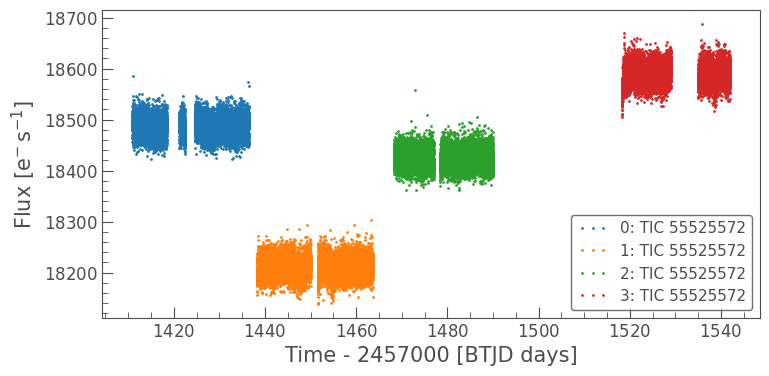

In [8]:
lc_collection.plot(linewidth = 0, marker = '.')

### Normalise graph points

AttributeError: 'LightCurveCollection' object has no attribute 'normalize'

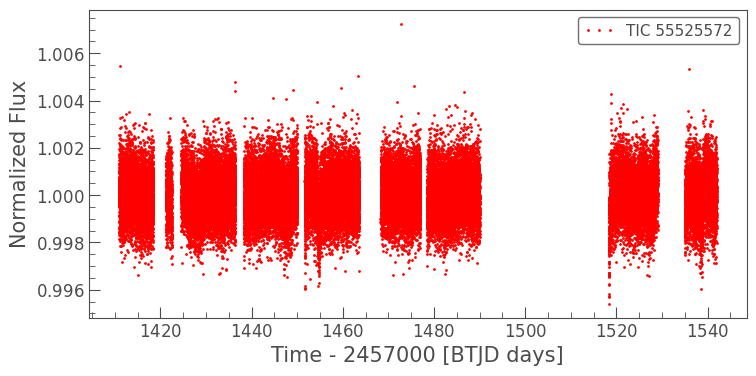

In [9]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.plot(linewidth = 0, marker = '.', color = 'red')
lc.normalize().plot()

## Binning Data

In [ ]:
bin_time = 15/24/60 # LK uses day units, this is 15 minutes over 24 hours
lc_collection_binned = lc_collection.bin(bin_time)
lc_collection_binned.plot()

### Plotting Region

fig, ax = plt.subplots(figsize = (10, 5))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markerSize = 1)
lc_collection_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'black', markerSize = 1)

## Phase Folding

In [ ]:
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9] # Query data, select data from mutliple sectors (e.g. all availablke first year TESS data)
lc_collection = available_data_select.download_all().stitch()
fig, ax = plt.subplots(figsize = (8,4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.7)

In [ ]:
period = 83.8979
t0 = 2125.847

lc_phased = lc_collection.fold(period = period, epoch_time = t0)
lc_phased.plot(linewidth = 0, color = 'gold', marker = '.', markersize = 1, alpha = 0.7)

lc_phased_binned = lc_phased.bin(15/24/60)
fig, ax = plt.subplots(figsize = (8,5)) # defines a plotting region to plot multiple data sets
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'blue', alpha = 0.4, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'purple', alpha = 0.8, markersize = 6, label = 'binned')

plt.xlim(-2, 2) # upper and lower limit for x-axis, zooming in from -40, 40 wide to -2, 2 wide
plt.ylim(0.996, 1.004) 